### Problem 14 ###

The following iterative sequence is defined for the set of positive integers:

$ n → n/2$ (n is even)
$n → 3n + 1$ (n is odd)

Using the rule above and starting with 13, we generate the following sequence:
13 → 40 → 20 → 10 → 5 → 16 → 8 → 4 → 2 → 1

It can be seen that this sequence (starting at 13 and finishing at 1) contains 10 terms. Although it has not been proved yet (Collatz Problem), it is thought that all starting numbers finish at 1.

Which starting number, under one million, produces the longest chain?

NOTE: Once the chain starts the terms are allowed to go above one million.


In [1]:

import numpy as np

In [2]:
def collatzseq(n):
    if n ==0:
        return []
    'returns the lenght of the sequence of collatz starting from n'
    collaseq = []
    while n > 1:
        if n%2 == 0:
            collaseq.append(n)
            n = n/2
        else:
            collaseq.append(n)
            n = 3*n + 1
    return len(collaseq)

In [3]:
def collatzseqlist(n):
    if n ==0:
        return []
    'returns the lenght of the sequence of collatz starting from n'
    collaseq = []
    while n > 1:
        if n%2 == 0:
            collaseq.append(n)
            n = n/2
        else:
            collaseq.append(n)
            n = 3*n + 1
    return collaseq

In [4]:
def euler14(n):
    'returns the number with the largest collatz sequence less than n'
    newmax = 0
    a = 1
    for i in range(3,n,2):
        k = collatzseq(i)
        if k > newmax:
            newmax = k
            a = i
    return newmax,a

In [3]:
euler14(1000000)

(524, 837799)

In [4]:
%timeit euler14(5000)

10 loops, best of 3: 120 ms per loop


In [5]:
%timeit euler14(50000)

1 loop, best of 3: 1.47 s per loop


In [6]:
%timeit euler14(100000)

1 loop, best of 3: 3.18 s per loop


In [7]:
%timeit euler14(200000)

1 loop, best of 3: 6.85 s per loop


In [8]:
%timeit euler14(300000)

1 loop, best of 3: 10.6 s per loop


In [10]:
%timeit euler14(1000000)

1 loop, best of 3: 57.6 s per loop


In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
l = []
ii = np.arange(1000)
for i in ii:
    l.append(collatzseq(i))

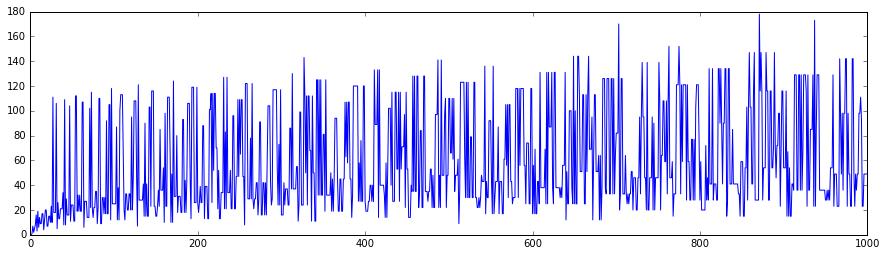

In [13]:
figure(figsize = (15,4))
plot(ii,l);

### teorema: "As maiores sequencias são as que começam em um impar"


In [14]:
maxi = []
newmax = 0

In [15]:
xs = np.arange(100000)
for x in xs:
    currmax = collatzseq(x)
    if newmax < currmax :
        newmax = currmax
    maxi.append(newmax)

In [16]:
# plot(maxi);

In [17]:
k = []
for maxs in maxi:
    k.append(maxi.index(maxs))

In [18]:
l = set()
for i in k:
    l.add(i)

In [19]:
u = []
for i in l:
    u.append(i)
u.sort()

[0, 2, 3, 6, 7, 9, 18, 25, 27, 54, 73, 97, 129, 171, 231, 313, 327, 649, 703, 871, 1161, 2223, 2463, 2919, 3711, 6171, 10971, 13255, 17647, 23529, 26623, 34239, 35655, 52527, 77031]


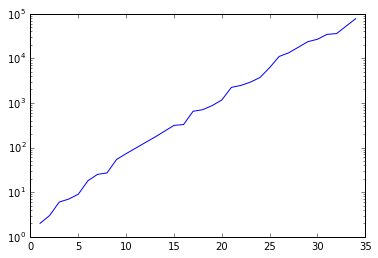

In [29]:
print(u)
semilogy(u);

In [30]:
j = arange(len(u))

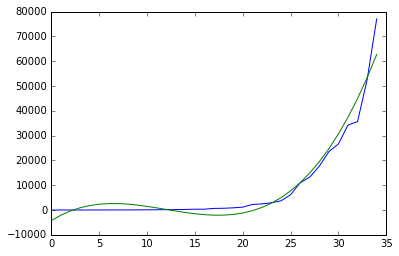

In [36]:
plot(u);
plot(j,polyval(polyfit(j,u,3),j))

### t1 - ' we dont need to look at the numbers less than x/2'


In [7]:
def littlesmarter(n):
    a = n//2
    newmax = 0
    if n%2 ==0:
        for i in range(n-1,a,-2):
            k = collatzseq(i)
            if k > newmax:
                newmax = k
                a = i
    else:
        for i in range(n-2,a,-2):
            k = collatzseq(i)
            if k > newmax:
                newmax = k
                a = i
    return newmax,a

In [22]:
%timeit littlesmarter(100000)

1 loop, best of 3: 1.69 s per loop


In [23]:
%timeit littlesmarter(500000)

1 loop, best of 3: 12.1 s per loop


In [24]:
%timeit littlesmarter(100000)

1 loop, best of 3: 1.69 s per loop


In [25]:
%timeit euler14(100000)

1 loop, best of 3: 3.19 s per loop


In [44]:
def backwardscollatz(n,teto):
    if n < teto:
        gen = [n]
    while n < teto:
        k = (n-1)/3
        if k%3  == 0 and k >=3:
            gen.append(n)
        n = 2*n
        gen.append(n)
    return gen
        

In [54]:
def backwardscollatz2(n,teto):
    if n < teto:
        gen = [n]
    while n < teto:
        k = (n-1)/3
        if k%1  == 0 and k >=3:
            gen.append(k)
        n = 2*n
        gen.append(n)
    return gen
        

In [55]:
backwardscollatz2(2,100)

[2, 4, 8, 16, 5.0, 32, 64, 21.0, 128]

In [47]:
backwardscollatz(2,100)

[2, 4, 8, 16, 5.0, 10.0, 3.0, 6.0, 12.0, 24.0, 48.0, 96.0, 192.0]

In [55]:
print(collatzseq(18))

20


In [32]:
a = range(0,10,1)
a

range(0, 10)

In [110]:
def smartercollatz(n):
    'tries to run backwards; by t1 we dont need to look at numbers less than the half of the number'
    teto = n
    js = [i for i in range(teto,2,-1)]
    newmax,score = 0,1
    for j in js:
        if j != 0:
            ks = collatzseqlist(j)
            currscore = len(ks) 
            if currscore > score:
                newmax = j
                score = currscore
            for k in ks:
                if k in js:
                    js[js.index(k)] = 0
    return newmax,score
            

In [ ]:
%timeit eu(100)

In [89]:
print(collatzseq(9))

[9, 28, 14.0, 7.0, 22.0, 11.0, 34.0, 17.0, 52.0, 26.0, 13.0, 40.0, 20.0, 10.0, 5.0, 16.0, 8.0, 4.0, 2.0]


In [111]:
smartercollatz(10)

(9, 19)

In [7]:
collatzseq(57)

[57,
 172,
 86.0,
 43.0,
 130.0,
 65.0,
 196.0,
 98.0,
 49.0,
 148.0,
 74.0,
 37.0,
 112.0,
 56.0,
 28.0,
 14.0,
 7.0,
 22.0,
 11.0,
 34.0,
 17.0,
 52.0,
 26.0,
 13.0,
 40.0,
 20.0,
 10.0,
 5.0,
 16.0,
 8.0,
 4.0,
 2.0]

In [ ]:
euler14()

In [92]:
smartercollatz(10)

[10, 5.0, 16.0, 8.0, 4.0, 2.0]
[10, 9, 8, 7, 6, 5, 4, 3] jsjsjsjs
[9, 28, 14.0, 7.0, 22.0, 11.0, 34.0, 17.0, 52.0, 26.0, 13.0, 40.0, 20.0, 10.0, 5.0, 16.0, 8.0, 4.0, 2.0]
[0, 9, 0, 7, 6, 0, 0, 3] jsjsjsjs
[]
[0, 0, 0, 0, 6, 0, 0, 3] jsjsjsjs
[]
[0, 0, 0, 0, 6, 0, 0, 3] jsjsjsjs
[6, 3.0, 10.0, 5.0, 16.0, 8.0, 4.0, 2.0]
[0, 0, 0, 0, 6, 0, 0, 3] jsjsjsjs
[]
[0, 0, 0, 0, 0, 0, 0, 0] jsjsjsjs
[]
[0, 0, 0, 0, 0, 0, 0, 0] jsjsjsjs
[]
[0, 0, 0, 0, 0, 0, 0, 0] jsjsjsjs


(9, 19)

In [12]:
collatzseq(54)

112

In [14]:
euler14(55)

(111, 27)

In [78]:
print(collatzseq(9))

[9, 28, 14.0, 7.0, 22.0, 11.0, 34.0, 17.0, 52.0, 26.0, 13.0, 40.0, 20.0, 10.0, 5.0, 16.0, 8.0, 4.0, 2.0]


In [79]:
print(collatzseq(7))

[7, 22, 11.0, 34.0, 17.0, 52.0, 26.0, 13.0, 40.0, 20.0, 10.0, 5.0, 16.0, 8.0, 4.0, 2.0]


In [77]:
backwardscollatz(7,10)

[7, 14]

In [76]:
backwardscollatz(9,10)

[9, 18]

In [16]:
%timeit euler14(1000)

100 loops, best of 3: 8.2 ms per loop


In [114]:
%timeit smartercollatz(1000)

1.53 s ± 34.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
def backwardscollatz(n,teto):
    k = n
    gen= [k]
    while n < teto:
        if (n-1)%3  == 0 and (n-1)/3 !=2 and (n-1)/3 !=1:
            n = (n-1)/3
            gen.append(n)
            n = 2*n
            gen.append(2*k)
    return gen

In [18]:
def reversetree(n):
    i = 0
    seed = [2]
    while len(seed) > 0:
        for sunlight in seed:
            i += 1
            seed = seed + [2*sunlight]
            seed.remove(sunlight)
            k = (sunlight -1)%3
            if (k) == 0:
                seed.append(k)
            if sunlight > 3*n + 1:
                break
    return seed
    


In [19]:
reversetree(100)

KeyboardInterrupt: 

### class notes 29/03


$\int_{1}^{N}\frac{l(n)}{n}dn$ ~ $\sum_{1}^{N} \frac{l(n)}{n}$

$\int_{1}^{N}\frac{dn}{l(n)}$ ~~~ $\int_{1}^{N} \frac{dn}{n^\alpha}$ = $\frac{N^{1-\alpha} - 1}{1 - \alpha}$

In [17]:
#p14foward
#p14reverse
#p14maxalloc

In [31]:
def p14reverse(x):
    'returns the backwardstree starting from the nmber 2'
    seed = [2]
    while len(seed) > 0:
        for life in seed:
            if life*2 <= x:
                k = life
                seed.append(2*k)
            seed.remove(k)
            if (k-1)%3 == 0:
                if 3*k+1 <= x:
                    seed.append(3*k+1)
    return seed
    
            
            

In [32]:
p14reverse(7)

ValueError: list.remove(x): x not in list

In [39]:
%timeit littlesmarter(1000000)

1 loop, best of 3: 9.06 s per loop


In [42]:
littlesmarter(55)

(109, 41)

In [43]:
euler14(55)

(111, 27)

In [58]:
def collatzseqlist(n,floor):
    if n ==0:
        return []
    'returns the sequence of collatz starting from n'
    collaseq = []
    while n > floor:
        if n%2 == 0:
            collaseq.append(n)
            n = n/2
        else:
            collaseq.append(n)
            n = 3*n + 1
    return (collaseq)

In [59]:
def smartercollatz(n):
    'tries to run backwards; by t1 we dont need to look at numbers less than the half of the number'
    teto = n
    js = [i for i in range(teto,teto//2,-1)]
    newmax,score = 0,1
    for j in js:
        if j != 0:
            ks = collatzseqlist(j,floor)
            currscore = len(ks) 
            if currscore > score:
                newmax = j
                score = currscore
            for k in ks:
                if k in js:
                    js[js.index(k)] = 0
    return newmax,score

In [60]:
%timeit smartercollatz(1000)

NameError: name 'floor' is not defined

In [84]:
smartercollatz(1000)

(871, 178)

In [75]:
%timeit smartercollatz(6500)

1 loop, best of 3: 11.5 s per loop


In [80]:
teto = 1000000

In [81]:
%timeit js = [i for i in range(teto,teto//2,-1)]

10 loops, best of 3: 32.2 ms per loop


In [127]:
def collatzer(n):
    ' n > 1'
    collist = [n]
    i = 1
    'returns a list with the descending collatz sequence of any guven number n'
    while collist[-1] != 2:
        k = collist[-1]
        if (k >> 1 ) << 1 == k:  # fast even checker
            collist.append(k >> 1)
            i += 1
        else:
            collist.append(3*k + 1)
            i += 1
    collist += [1]
    return collist

In [129]:
%timeit collatzer(1000)

10000 loops, best of 3: 59 µs per loop
